In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [49]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [50]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,
        postgres_pw, postgres_host, postgres_port, postgres_db))

In [51]:
dfraw = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()
dfraw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [52]:
dfraw.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [53]:
df = dfraw.copy()
df.dropna()

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

# Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?



NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)
NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)
NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)


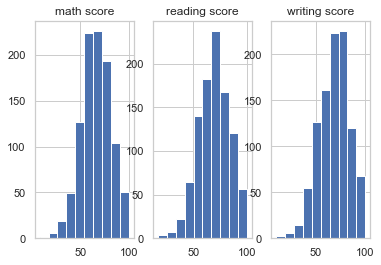

In [54]:

from scipy.stats import normaltest
plt.subplot(1,3,1)
plt.hist(df.loc[df['math score']>0, 'math score'])
plt.title('math score')
print(normaltest(df['math score']))         

plt.subplot(1,3,2)
plt.hist(df.loc[df['reading score']>0, 'reading score'])
plt.title('reading score')         
print(normaltest(df['reading score']))         

plt.subplot(1,3,3)
plt.hist(df.loc[df['writing score']>0, 'writing score'])
plt.title('writing score')          
print(normaltest(df['writing score']))         
          
    #boxcox(df)

In [60]:
type(df.loc[df['writing score']>0, 'writing score'])

pandas.core.series.Series

None of the test score results are quite normal

NormaltestResult(statistic=1.8323075851586939, pvalue=0.4000547794685686)
NormaltestResult(statistic=5.282274606965809, pvalue=0.07128015626992971)
NormaltestResult(statistic=6.267311355052559, pvalue=0.04355827085003712)


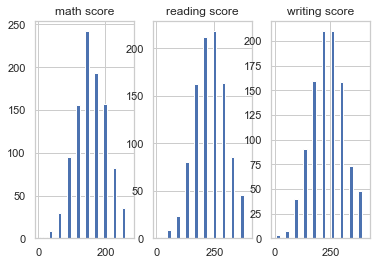

In [65]:
from scipy.stats import boxcox
x = boxcox(df.loc[df['math score']>0, 'math score'])

plt.subplot(1,3,1)
plt.hist(x)
plt.title('math score')
print(normaltest(x[0]))         

plt.subplot(1,3,2)
plt.hist(boxcox(df.loc[df['reading score']>0, 'reading score']))
plt.title('reading score')         
print(normaltest(boxcox(df.loc[df['reading score']>0, 'reading score'])[0]))        

plt.subplot(1,3,3)
plt.hist(boxcox(df.loc[df['writing score']>0, 'writing score']))
plt.title('writing score')          
print(normaltest(boxcox(df.loc[df['writing score']>0, 'writing score'])[0]))       
          

In [61]:
boxcox(df.loc[df['reading score']>0, 'reading score'])[0]
#For some reason, the boxcox array generated a second element after the 
#transformed value list. Therefore, need to only return the first element of the 
#array when testing for normality. Good to know.

array([252.60869771, 342.99374201, 369.36730195, 183.3366856 ,
       281.90948736, 306.97048398, 369.36730195, 124.47004362,
       214.92476383, 196.70968886, 170.21983306, 161.62194252,
       296.87755428, 252.60869771, 165.9059899 , 267.1514422 ,
       337.78238393,  82.85901473, 120.50594909, 187.76631053,
       238.28688951, 267.1514422 , 170.21983306, 257.43201679,
       247.80992385, 262.27966781, 170.21983306, 238.28688951,
       243.03591336, 243.03591336, 262.27966781, 219.54531408,
       252.60869771, 120.50594909, 327.42421544, 296.87755428,
       296.87755428, 214.92476383, 342.99374201, 178.93551582,
       201.22284498, 257.43201679, 187.76631053, 219.54531408,
       178.93551582, 170.21983306, 219.54531408, 247.80992385,
       262.27966781, 312.05068567, 174.56312166, 238.28688951,
       128.46814867, 281.90948736, 312.05068567, 116.57637525,
       317.15315167, 174.56312166, 192.22407921,  34.46931217,
       262.27966781, 108.82293293, 201.22284498, 291.86

The boxcox sufficiently normalized math and reading scores, but not writing score distribution.

# Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [67]:
df['mean score'] = (df['math score']+ df['reading score']+ df['writing score'])/3
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   mean score  
0   72.666667  
1   82.333333  
2   92.666667  
3   49.333333  
4   76.333333

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)
NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)


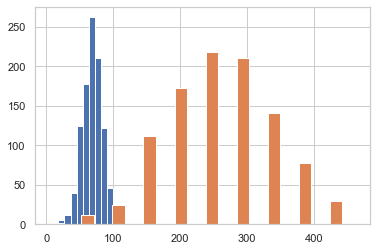

In [74]:
plt.hist(df['mean score'])
print(normaltest(df['mean score']))
plt.hist(boxcox(df['mean score']))
print(normaltest(boxcox(df['mean score'])[0]))

# Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

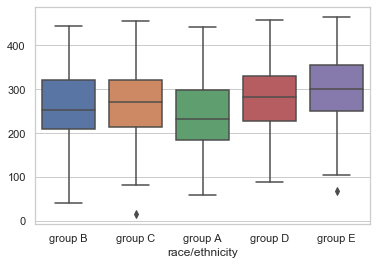

In [79]:
sns.boxplot(x= 'race/ethnicity', y= boxcox(df['mean score'])[0], data=df)

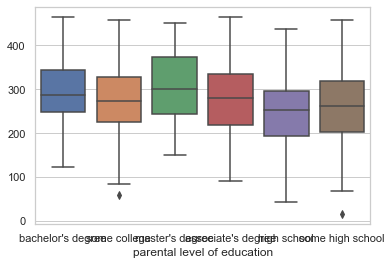

In [80]:
sns.boxplot(x= 'parental level of education', y= boxcox(df['mean score'])[0], data=df)

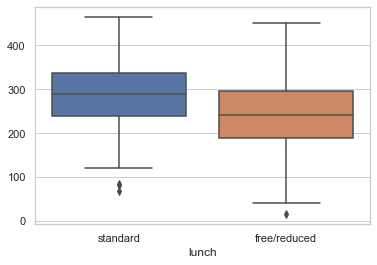

In [81]:
sns.boxplot(x= 'lunch', y= boxcox(df['mean score'])[0], data=df)

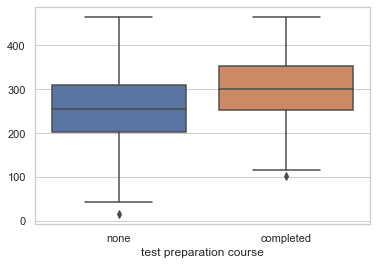

In [82]:
sns.boxplot(x= 'test preparation course', y= boxcox(df['mean score'])[0], data=df)

All variables have some kind of relationship